## Project 7: Power Law Distributions


### Abstract & Description:



  A power law distribution in statistics is described as the relationship between two different set of data that occurs when one set changes as a power function of the other. In this experiment, we study the sizes in acres of wildfires occurring on US federal land between 1986 and 1996 and we will be counting how many times wildfires occurred for a certain land area.
The study of Power Law Distributions requires the use of logarithms. In our case, we use logarithms to solve for the slope of the set of data and calculate the error with the actual data.
As a result, we obtain the following:

$m= -0.48316302192218863 +/- 0.001925179763890549 $

$b= 9.226185989074825 +/- 0.005604600100309432 $


Cov-matrix solution:

$m= -0.483163022434125 +/- 0.029049846592620915$

$b= 9.226185990168258 +/- 0.08346544428817503$

### Algorithm and Discussion
##### Fitting Data with Matrices 


We can see that we have something that looks like it might be a power law. How can we tell? We'll use "linear least squares" analysis.

When fitting some experimental data to a model, there are typically a set of parameters $(\alpha_1, \alpha_2, \ldots, \alpha_n)$ that need to be found so that the function $\chi^2$ is a minimum. We can think of the parameters as an n-vector called $\alpha$. The data consist of a set of paired numbers $(x_i, y_i)$ and we can define $\chi^2$ as

$$
\chi^2 = \sum_{i=1}^{m} {(y_i - y^\star(x_i,\alpha))^2\over \sigma_i^2},
$$
where $\sigma_i$ is the uncertainty in $y_i$, and $y^\star$ is the model value corresponding to $x_i$ (and the value of the parameters $\alpha$). If the model $y^\star(x,\vec\alpha)$ is linear then we can write $y^\star$ as:

$$
y^\star (x) = \alpha_1 X_1(x)+\alpha_2 X_2(x)+\ldots+\alpha_n X_n(x).
$$
or

$$
y^\star(x) = \sum_{j=1}^{n} \alpha_j X_j(x),
$$
where the $X_j$ are a set of functions that are to be superposed with coefficients $\alpha_j$ to form the model. A common example of this would be a straight line fit $y^\star(x) = mx+b$ where the functions are $x$ and 1 for the paramters $m$ and $b$ respectively.

Notice that, since the $x$'s are at fixed measured values, this whole thing can be cast into a single matrix equation. If we define the following $M$ matrix:

$$
M_{ij} = X_j(x_i)
$$
and if we think of $y^\star$ as an $m$-vector of model values evaluated at the $m$ data points $x_i$ and $y$ as an experimental $m$-vector $y$, then the model vector can be evaluated by matrix multiplication as:

$$
y^\star = M \alpha
$$
and the difference vector between the model and the data becomes simply

$$
y - y^\star = y - M\alpha
$$
Finally we can write $\chi^2$ as

$$
\chi^2 = (y - M\alpha)^T S (y - M\alpha) \,\,\,\,\,\,\,\,(1)
$$
where $S$ is a diagonal matrix of $1/\sigma_i^2$ and the $T$ on the left side means "transpose".

Now it is a simple matter to find the values of the paramters that minimize $\chi^2$. We require that $\nabla_{\alpha}\chi^2 = 0$. If you play around with this you can convince yourself that this means:

$$
M^T S(y - M\alpha) = 0
$$
and therefore:

$$
\alpha = (M^T SM)^{-1}M^T S y.  \,\,\,\,\,\,\,\,(2)
$$


In [144]:
%pylab inline

import pandas as pd                    # pandas is the "python data analysis package"

import os                              # operating system services
from scipy.optimize import curve_fit   # non-linear curve fitting

Populating the interactive namespace from numpy and matplotlib


In [145]:
f = open("Proj7Data.csv")
data_file = f.readlines()

In [146]:
data = []
for i in data_file:
    data.append(float(i))

Text(0.5, 0, 'log(wildfires in acres)')

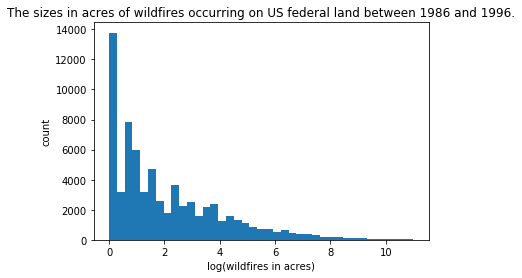

In [147]:
ns,bins,patches = hist(np.log(array(data)),bins=np.linspace(0,11,40))
title("The sizes in acres of wildfires occurring on US federal land between 1986 and 1996.")
ylabel("count")
xlabel("log(wildfires in acres)")

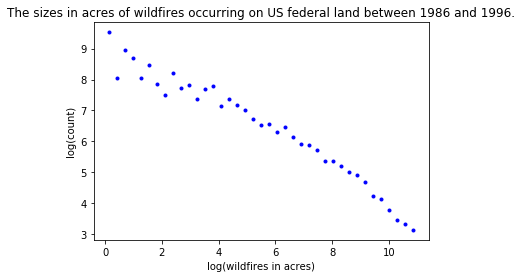

In [148]:
xvals=(bins[:-1]+bins[1:])/2.0
counts=ns+1
yvals=log(counts)
title("The sizes in acres of wildfires occurring on US federal land between 1986 and 1996.")
ylabel("log(count)")
xlabel("log(wildfires in acres)")
plot(xvals,yvals,'b.')

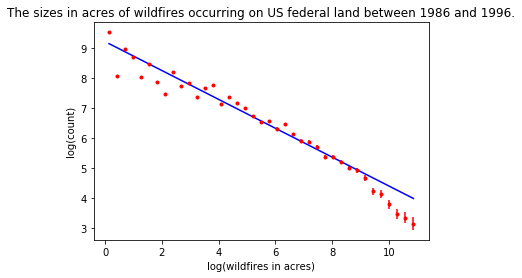

In [149]:


def doFit(funcs, xvals, yvals, sigma):    
    S=diag((1.0/sigma)**2)
    
    M = array(funcs).T
    MtM = M.T.dot(S.dot(M))
    MtMInv = inv(MtM)
    MtY = M.T.dot(S.dot(yvals))
    alpha = MtMInv.dot(MtY)     
    
    ystar = M.dot(alpha)
    
    return (alpha, ystar, MtMInv)

fx1 = ones(len(xvals)) 
fx2 = xvals             
sigma=1.0/sqrt(abs(counts))

alpha, ystar, fcov = doFit([fx1, fx2], xvals, yvals, sigma)

mFit = alpha[1]
bFit = alpha[0]

errorbar(xvals, yvals, sigma, fmt='r.') 
title("The sizes in acres of wildfires occurring on US federal land between 1986 and 1996.")
ylabel("log(count)")
xlabel("log(wildfires in acres)")

plot(xvals,ystar, 'b-')


In [150]:

N=1000    
mList=[] 
bList=[]

for i in range(N):
   
    mcY = ystar + sigma*normal(size=len(xvals))
    mcAlpha,mcYstar,mccov = doFit([fx1,fx2],xvals,mcY,sigma)   # repeatedly fit mc data
    mList.append(mcAlpha[1])
    bList.append(mcAlpha[0])
    
marr=array(mList)
barr=array(bList)

mAvg = marr.sum()/N
bAvg = barr.sum()/N
delM = marr-mAvg
delB = barr-bAvg
sigM = sqrt((delM*delM).sum()/(N-1)) # sigM is the std-deviation of the m values 
sigB = sqrt((delB*delB).sum()/(N-1))   # sigB is the std-deviation of the b values



print # print a blank link
print("Compare to cov-matrix for fun:\nSlope=", alpha[1],"\nIntercept= ",alpha[0])
print("sqsrt(cov[1,1]) (should be sigma m)", sqrt(fcov[1,1]))
print("sqrt(cov[0,0]) (should be sigma b)", sqrt(fcov[0,0]))


Compare to cov-matrix for fun:
Slope= -0.483163022434125 
Intercept=  9.226185990168258
sqsrt(cov[1,1]) (should be sigma m) 0.001915810900987655
sqrt(cov[0,0]) (should be sigma b) 0.00550446997655349


Slope= -0.48316302192218863 +/- 0.0018806164909989335 ( -0.48504363841318754 , -0.4812824054311897 )
Intercept= 9.226185989074825 +/- 0.005431669305077733 ( 9.14272054478665 , 9.231617658379902 )

Compare to cov-matrix for fun:
Slope= -0.483163022434125 
Intercept=  9.226185990168258
sqsrt(pcov[0,0]) (should be sigma m) 0.029049846592620915
sqrt(pcov[1,1]) (should be sigma b) 0.08346544428817503


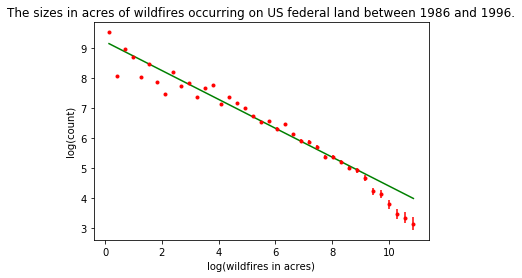

In [151]:
#
# Just to see same data fit using the non-linear scipy package "curve_fit":
#

def fLinear(x, m, b):
    return m*x + b

popt, pcov = curve_fit(fLinear, xvals, yvals, p0=(alpha[1],alpha[0]), sigma=sigma)

m=popt[0]          # slope
dm=sqrt(pcov[0,0]) # sqrt(variance(slope))
b=popt[1]          # int
db=sqrt(pcov[1,1]) # sqrt(variance(int))
ystar=fLinear(xvals, m, b)

N=1000    # number of samples to take
mList=[]  # keep track of monte-carlo fit parameters
bList=[]

for i in range(N):
    """
    Generate mc data with the same statistical properties as the real data.
    Repeat the fit for each set, and record the parameters.
    """
    mcY = ystar + sigma*normal(size=len(xvals))  # generate fabricated data to fit
    mcpopt, mcpcov = curve_fit(fLinear, xvals, mcY, p0=(m,b), sigma=sigma)
    mList.append(mcpopt[0])  # store the fit paramters for the fab-data
    bList.append(mcpopt[1])
    
#
# Compute the statistics of the mc-results
#
marr=array(mList)
barr=array(bList)

mAvg = marr.sum()/N
bAvg = barr.sum()/N
delM = marr-mAvg
delB = barr-bAvg
sigM = sqrt((delM*delM).sum()/(N-1))  # sigM is the std-deviation of the m values
sigB = sqrt((delB*delB).sum()/(N-1))  # sigB is the std-deviation of the b values

errorbar(xvals, yvals, sigma, fmt='r.') 
title("The sizes in acres of wildfires occurring on US federal land between 1986 and 1996.")
ylabel("log(count)")
xlabel("log(wildfires in acres)")

plot(xvals,ystar, 'g-')
print("Slope=", m, '+/-', sigM, "(", m-sigM,",",m+sigM, ")")
print("Intercept=", b, '+/-', sigB, "(", b-db,",",b+sigB, ")")

print() # print a blank link
print("Compare to cov-matrix for fun:\nSlope=", alpha[1],"\nIntercept= ",alpha[0])
print("sqsrt(pcov[0,0]) (should be sigma m)", sqrt(pcov[0,0]))
print("sqrt(pcov[1,1]) (should be sigma b)", sqrt(pcov[1,1]))


### Results 

In this experiment, we used two techniques to solve for the slope and the intercept with their respective margin of errors:

1. Curve-fitting function: 

Already implemented in python. With a couple of manipulations, it gave the following as results:

Slope= -0.483163022434125 

Intercept=  9.226185990168258
###### Reults with Error:
$ m_E = -0.483163022434125 +/- 0.029049846592620915$

$ b_E = 9.226185990168258 +/- 0.08346544428817503$
2. Monte Carlo simulation with Matrices:

We used the Monte carlo algorithm in order to generate fabricated data. The data used here are not real data, but they follow the same pattern and have the same behavior as the real ones. We ended up with the following:
###### Results with Error:

$ m_E= -0.48316302192218863 +/- 0.0019404398208205684$

$ b_E= 9.226185989074825 +/- 0.00545347272670797$ 

Just by looking at the numbers, we can clearly see how the numbers how close to the ones obtained before. But, let's now compute the error between the results obtained with the Monte Carlo and the Curve-Fitting function and state whether or not the Monte Carlo technique can be used in such a problem.
$$ Error = \frac{Data_c - Data_m}{Data_c} x 100 $$

Error in slope $< 10^-7$ 

Error in Intercept $< 10^-8$

### Conclusion

For this experiment, we used the data of the sizes in acres of wildfires occurring on US federal land between 1986 and 1996 in order to explore in depth Power Law Distribution. We ended up applying a couple of techniques for fitting  and observed that both of them are valid.
Altogether, it would be safe to declare that both techniques boil down to the same results, or almost by considering how small the errors between their results are, mostly less than $10^-7$. 